## Load Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('housing_dataset.csv')
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


## Data Preprocessing

In [3]:
df = df.drop(['Home','Brick'], axis=1)
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,114300,1790,2,2,2,East
1,114200,2030,4,2,3,East
2,114800,1740,3,2,1,East
3,94700,1980,3,2,3,East
4,119800,2130,3,3,3,East
...,...,...,...,...,...,...
123,119700,1900,3,3,3,East
124,147900,2160,4,3,3,East
125,113500,2070,2,2,2,North
126,149900,2020,3,3,1,West


In [4]:
#Clean Data
df.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Neighborhood    0
dtype: int64

## Exploratory Data Analysis

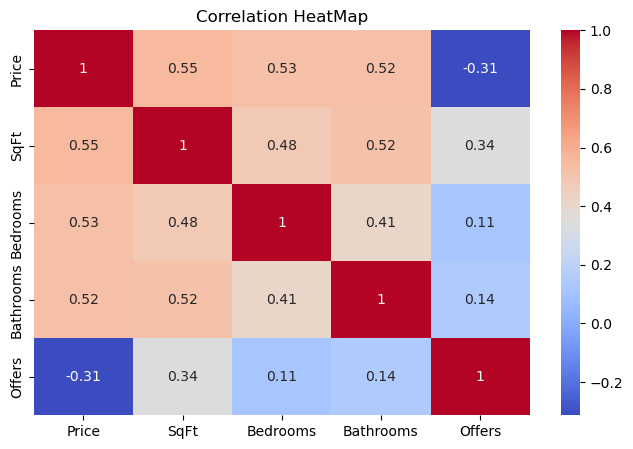

In [5]:
# Check Correlation betwwen Attributes
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation HeatMap")
plt.show()

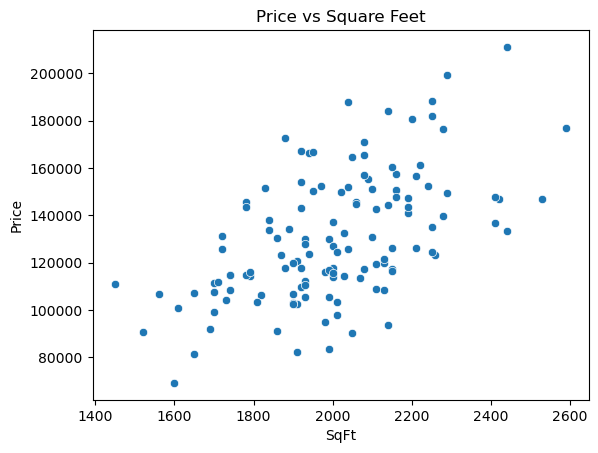

In [6]:
# Square Feet VS Price
sns.scatterplot(x='SqFt', y='Price', data=df)
plt.title('Price vs Square Feet')
plt.show()

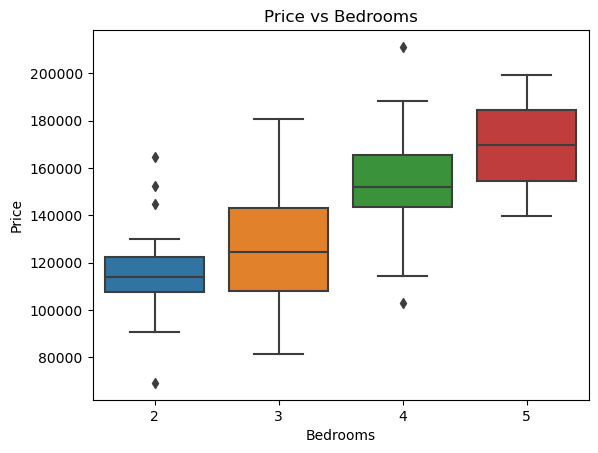

In [7]:
#Price vs Bedrooms
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

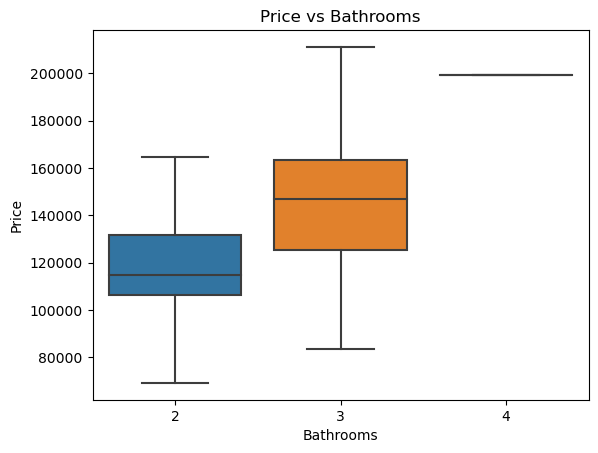

In [8]:
sns.boxplot(x='Bathrooms', y='Price', data=df)
plt.title('Price vs Bathrooms')
plt.show()

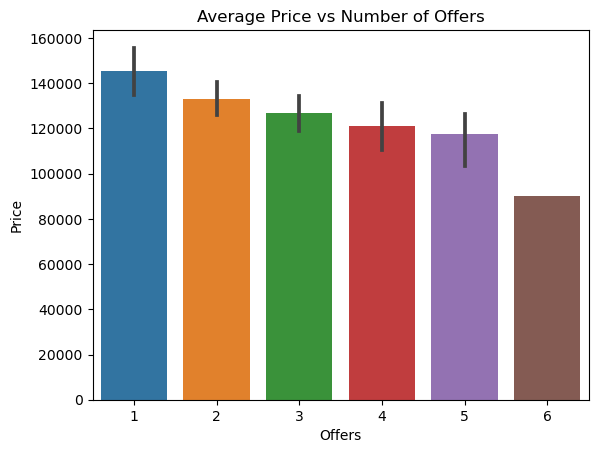

In [9]:
sns.barplot(x='Offers', y='Price', data=df)
plt.title('Average Price vs Number of Offers')
plt.show()

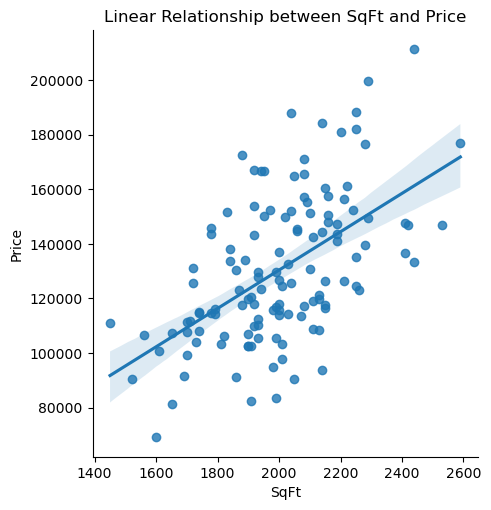

In [10]:
sns.lmplot(x='SqFt', y='Price', data=df)
plt.title('Linear Relationship between SqFt and Price')
plt.show()

C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

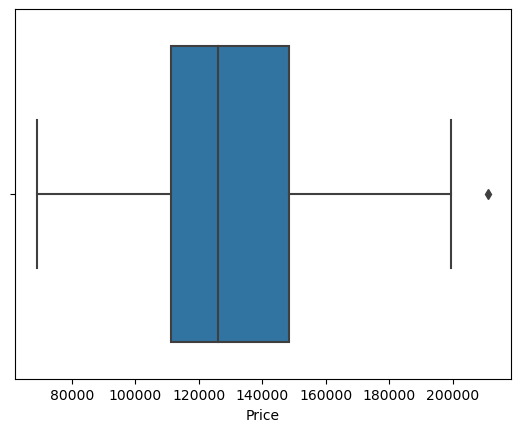

In [11]:
sns.boxplot(df['Price'])

In [13]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] > Q1 - 1.5*IQR) & (df['Price'] < Q3 + 1.5*IQR)]

C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

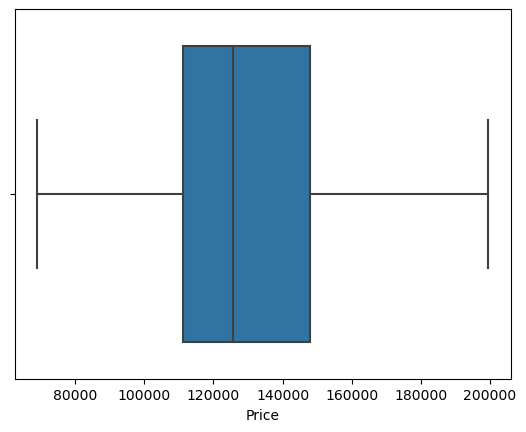

In [14]:
sns.boxplot(df['Price'])

## Lable Encoding With One hote Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,114300,1790,2,2,2,0
1,114200,2030,4,2,3,0
2,114800,1740,3,2,1,0
3,94700,1980,3,2,3,0
4,119800,2130,3,3,3,0
...,...,...,...,...,...,...
123,119700,1900,3,3,3,0
124,147900,2160,4,3,3,0
125,113500,2070,2,2,2,1
126,149900,2020,3,3,1,2


In [17]:
x = df.drop(['Price'], axis=1)
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)
y_pred

array([132195.66324879, 135169.04643117,  98027.40577676, 205108.61015509,
       122526.93083781, 155197.53174443, 162407.61618512, 132294.54561603,
       137911.61153665, 121472.9513835 , 127774.33757546, 113624.74033336,
        86145.33704645, 160065.86456872, 112077.91547517, 107305.54533119,
       154257.67918959, 133224.58789127, 130723.06149521, 140487.36103731,
       149179.85751118, 128781.91819142, 130886.35668745, 172597.57885166,
        95749.8618089 , 115306.83094106])

## Model Evaluation

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 125125296.64026934
R-squared: 0.8230442782109401
Root Mean Square Error:  11185.941920118723
Mean Absolute Error:  9391.708743186671


## Save Model as Pickel File 

In [53]:
import pickle
filname = 'House_Prediction.sav'
pickle.dump(model, open(filname,'wb'))

In [54]:
x_test.head()

,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
66,2210,3,3,4,1
102,2410,3,3,4,0
20,1790,3,2,3,0
116,2290,5,4,1,2
108,1990,3,3,3,0


In [56]:
load_model = pickle.load(open(filname, 'rb'))

In [57]:
load_model.predict([[2250,3,3,4,0]])

C:\Users\jayes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([136029.43888889])